# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pytz
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


from_zone = pytz.utc
to_zone = pytz.timezone('America/New_York')
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json["coord"]["lat"]
        city_lng = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"]
        city_humidity = city_json["main"]["humidity"]
        city_clouds = city_json["clouds"]["all"]
        city_wind = city_json["wind"]["speed"]
        city_country = city_json["sys"]["country"]
        city_date = city_json["dt"]
        utc_datetime = datetime.utcfromtimestamp(city_date).replace(tzinfo=from_zone)
        local_datetime = utc_datetime.astimezone(to_zone)
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | rikaze
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | westport
Processing Record 7 of Set 1 | funadhoo
Processing Record 8 of Set 1 | ust'-kalmanka
Processing Record 9 of Set 1 | moose jaw
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | utrik
Processing Record 12 of Set 1 | likasi
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | prince rupert
Processing Record 15 of Set 1 | znomenka
Processing Record 16 of Set 1 | tura
Processing Record 17 of Set 1 | guerrero negro
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | langzhong
Processing Record 20 of Set 1 | la'ie
Processing Record 21 of Set 1 | port moresby
Processing Record 22 of Set 1 | kingston
Processing Record 23 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,5.74,66,8,2.55,US,1713749128
1,puerto natales,-51.7236,-72.4875,2.15,92,86,2.21,CL,1713749120
2,port-aux-francais,-49.3500,70.2167,5.08,72,15,12.35,TF,1713748932
3,rikaze,29.2500,88.8833,9.57,17,22,1.69,CN,1713749409
4,carnarvon,-24.8667,113.6333,24.94,39,0,7.43,AU,1713749146


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,5.74,66,8,2.55,US,1713749128
1,puerto natales,-51.7236,-72.4875,2.15,92,86,2.21,CL,1713749120
2,port-aux-francais,-49.3500,70.2167,5.08,72,15,12.35,TF,1713748932
3,rikaze,29.2500,88.8833,9.57,17,22,1.69,CN,1713749409
4,carnarvon,-24.8667,113.6333,24.94,39,0,7.43,AU,1713749146


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

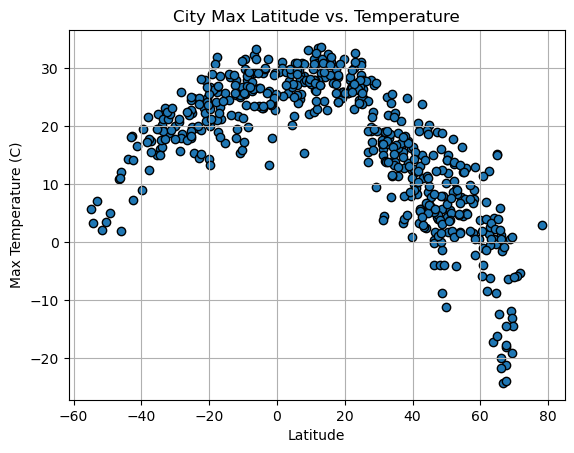

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter( city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")
plt.grid(True)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

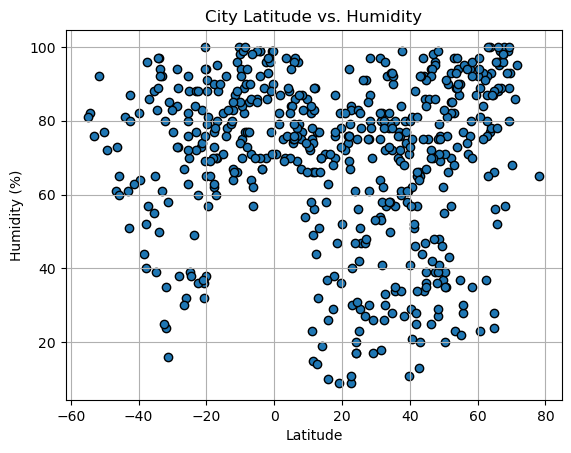

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter( city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")
plt.grid(True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

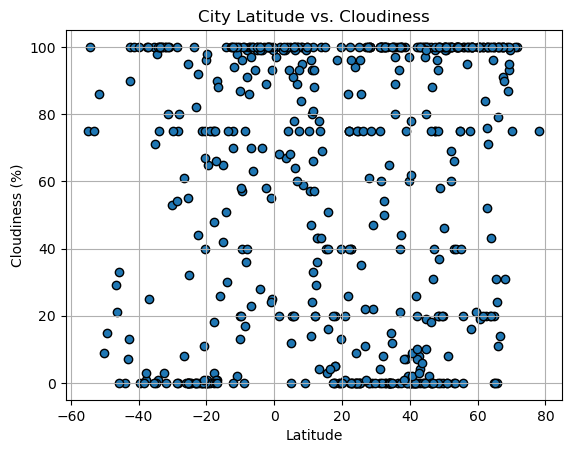

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter( city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")
plt.grid(True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

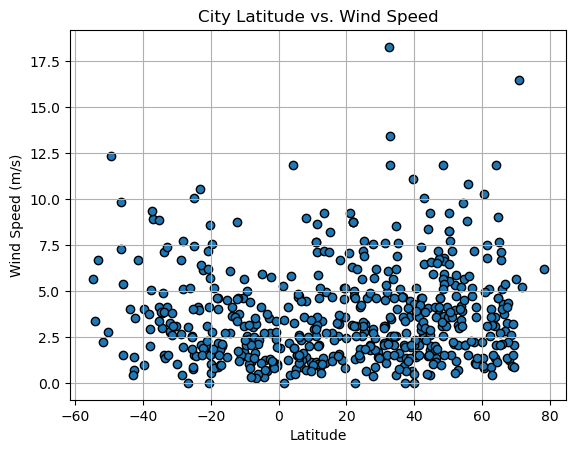

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter( city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")
plt.grid(True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel, ylabel, title):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {rvalue**2:.2f}"


In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,5.74,66,8,2.55,US,1713749128
3,rikaze,29.2500,88.8833,9.57,17,22,1.69,CN,1713749409
5,westport,41.1415,-73.3579,9.30,51,0,1.54,US,1713749409
6,funadhoo,6.1500,73.2667,29.65,75,64,4.72,MV,1713749410
7,ust'-kalmanka,52.1207,83.3050,13.59,57,100,5.34,RU,1713749410


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,2.15,92,86,2.21,CL,1713749120
2,port-aux-francais,-49.3500,70.2167,5.08,72,15,12.35,TF,1713748932
4,carnarvon,-24.8667,113.6333,24.94,39,0,7.43,AU,1713749146
11,likasi,-10.9814,26.7333,15.38,96,2,1.58,CD,1713749410
12,adamstown,-25.0660,-130.1015,22.37,70,32,10.03,PN,1713749090


###  Temperature vs. Latitude Linear Regression Plot

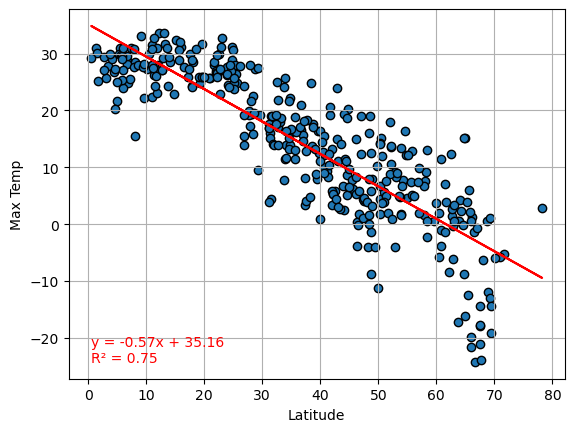

In [36]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o", edgecolors="black")

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Calculate regression line
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Plot regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Calculate R-squared value
r_squared = rvalue ** 2

# Equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}"

# Annotate the equation on the plot
plt.annotate(line_eq, (northern_hemi_df["Lat"].min(), northern_hemi_df["Max Temp"].min()), color="red")

# Enable grid
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Show plot
plt.show()

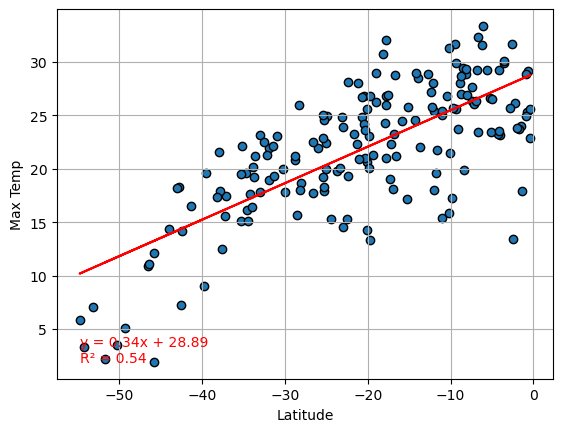

In [38]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o", edgecolors="black")

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Calculate regression line
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Plot regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Calculate R-squared value
r_squared = rvalue ** 2

# Equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}"

# Annotate the equation on the plot
plt.annotate(line_eq, (southern_hemi_df["Lat"].min(), southern_hemi_df["Max Temp"].min()), color="red")

# Enable grid
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

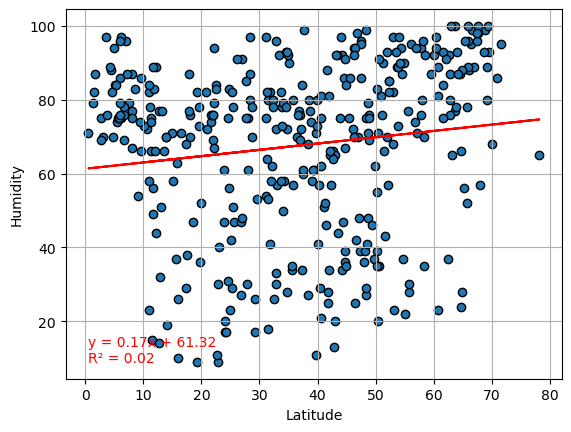

In [39]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", edgecolors="black")

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Calculate regression line
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Plot regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Calculate R-squared value
r_squared = rvalue ** 2

# Equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}"

# Annotate the equation on the plot
plt.annotate(line_eq, (northern_hemi_df["Lat"].min(), northern_hemi_df["Humidity"].min()), color="red")

# Enable grid
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Show plot
plt.show()

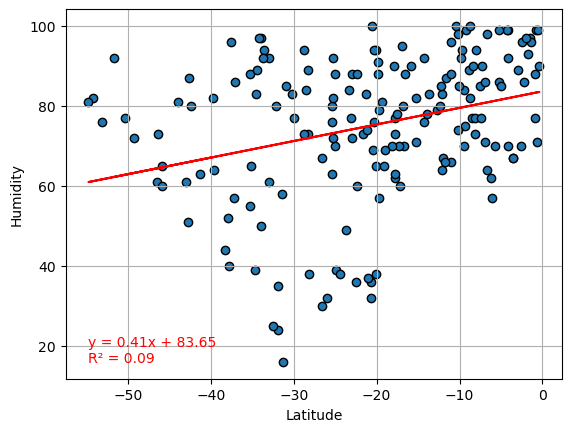

In [41]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", edgecolors="black")

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Calculate regression line
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Plot regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Calculate R-squared value
r_squared = rvalue ** 2

# Equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}"

# Annotate the equation on the plot
plt.annotate(line_eq, (southern_hemi_df["Lat"].min(), southern_hemi_df["Humidity"].min()), color="red")

# Enable grid
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

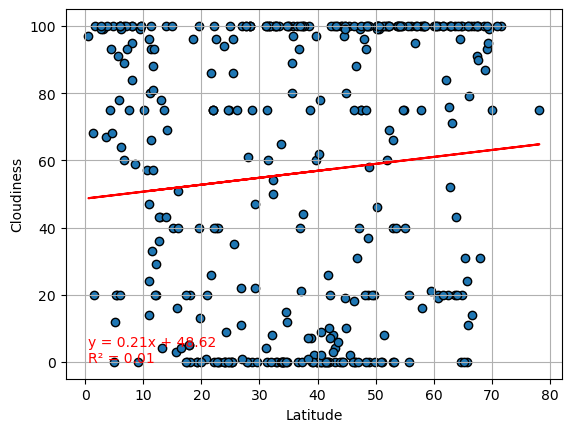

In [42]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", edgecolors="black")

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Calculate regression line
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Plot regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Calculate R-squared value
r_squared = rvalue ** 2

# Equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}"

# Annotate the equation on the plot
plt.annotate(line_eq, (northern_hemi_df["Lat"].min(), northern_hemi_df["Cloudiness"].min()), color="red")

# Enable grid
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Show plot
plt.show()

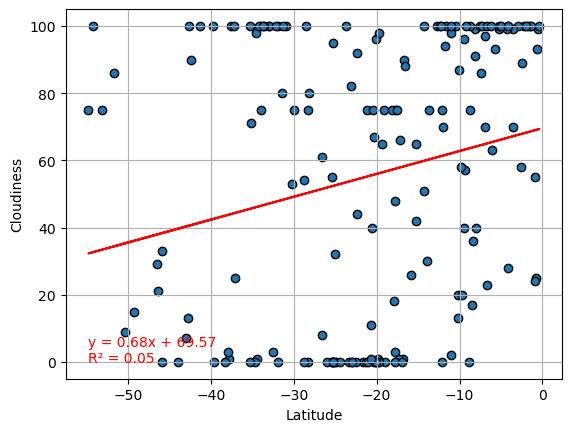

In [43]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", edgecolors="black")

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Calculate regression line
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Plot regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Calculate R-squared value
r_squared = rvalue ** 2

# Equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}"

# Annotate the equation on the plot
plt.annotate(line_eq, (southern_hemi_df["Lat"].min(), southern_hemi_df["Cloudiness"].min()), color="red")

# Enable grid
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

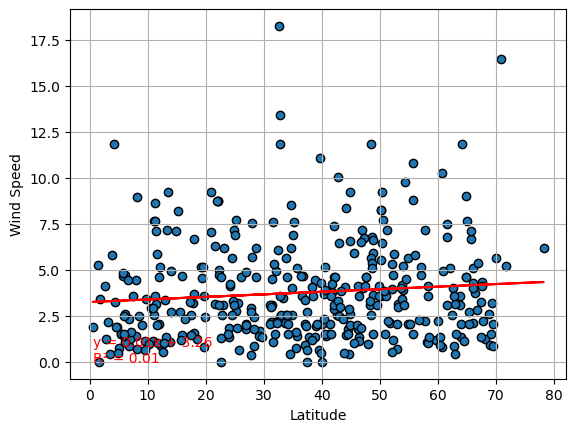

In [44]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", edgecolors="black")

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Calculate regression line
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Plot regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Calculate R-squared value
r_squared = rvalue ** 2

# Equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}"

# Annotate the equation on the plot
plt.annotate(line_eq, (northern_hemi_df["Lat"].min(), northern_hemi_df["Wind Speed"].min()), color="red")

# Enable grid
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Show plot
plt.show()

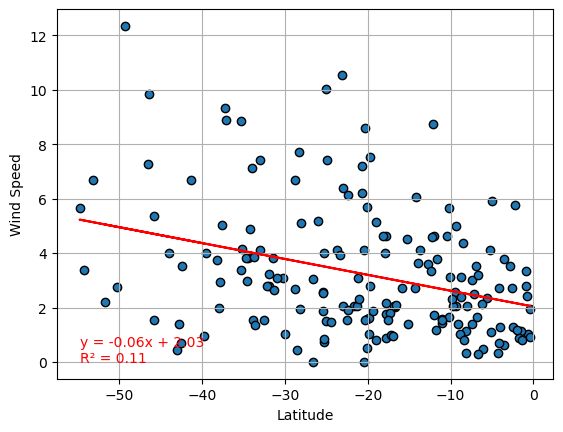

In [45]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", edgecolors="black")

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Calculate regression line
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Plot regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Calculate R-squared value
r_squared = rvalue ** 2

# Equation of the regression line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}"

# Annotate the equation on the plot
plt.annotate(line_eq, (southern_hemi_df["Lat"].min(), southern_hemi_df["Wind Speed"].min()), color="red")

# Enable grid
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE